In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [7]:
df.shape

(28820, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

####  La columna "DEP_DELAY" se utiliza para registrar los retrasos o adelantos en la salida de vuelos con respecto a los horarios programados. Los valores positivos representan retrasos, mientras que los valores negativos representan adelantos en la salida.

In [9]:
#vemos los datos que existen en dep_delay , esto porque sera nuestra variable target y la utilizaremos mas adelante.
df['DEP_DELAY'].unique()

array([  -1,   -7,   40,   -2,   -4,   -5,    0,    3,   -3,  108,   -6,
          4,    6,   29,    7,   71,    8,   14,    1,    2,   88,   37,
        123,   51,   94,   -8,   38,   54,  -10,   21,  106,    9,  197,
         11,   60,   48,   -9,   17,  137,  -11,   31,   72,   24,  -12,
         32,   49,   10,   61,   44,  -13,   36,   15,   46,  278,   20,
         19,   26,   89,   81,   52,   33,  101,  156,   39,   34,  115,
         27,   25,  -15,   18,  -14,   65,    5,   63,   13,   82,   42,
        152,   50,   16,   23,   30,   35,   58,   76,   70,   12,  133,
        113,  209,   22,   43,   73,  111,   41,   56,  104,  110,  271,
         67,  203,   28,   90,   47,  212,  -16,   68,   91,  107,  138,
         74,   79,  240,   96,  114,  146,   95,  143,  126,  131,  119,
        135,   87,   64,   62,   80,  100,   69,   59,  199,  122,   86,
         83,  320,   99,  374,  150,  184,  139,   53,  414,  193,  134,
        116,  420,  158,  141,  124,  299,  263,  6

In [10]:
#converti los datos en boleanos asi , cree una columna  llamada DELAY STATUS , que indica 1 NO DELAY Y 0 DELAY
df['DELAY_STATUS'] = df['DEP_DELAY'].apply(lambda x: 1 if x >= 0 else 0)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0


In [11]:
df['DELAY_STATUS'].value_counts()

0    19549
1     9271
Name: DELAY_STATUS, dtype: int64

In [12]:
#borramos la columna dep_delay
df.drop(['DEP_DELAY'] , axis=1 , inplace=True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,N828JB,CHS,124,636,324,323,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,N992JB,LAX,371,2475,340,333,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,N959JB,FLL,181,1069,301,341,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,N999JQ,MCO,168,944,345,343,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,N880DN,ATL,139,760,360,356,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0


Text(0.5, 1.0, 'DELAY STATUS')

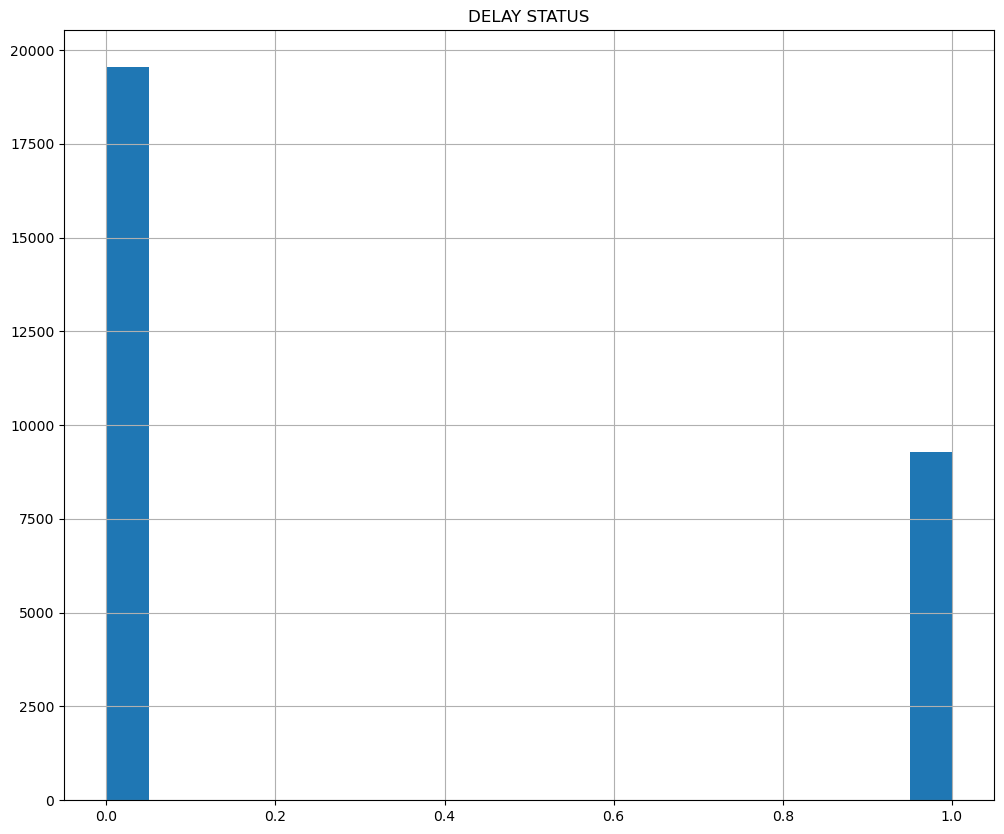

In [13]:
#Prices distribution
plt.figure(figsize=(12,10))
df['DELAY_STATUS'].hist(bins=20)
plt.title('DELAY STATUS')

In [14]:
##Checamos los valores y reemplazamos por espacios en blanco 

df['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6\xa0', '9\xa0', '5\xa0', '8\xa0',
       '10', '4\xa0', '7\xa0', '3\xa0', '2\xa0', '11', '0\xa0', '-1',
       '1\xa0', '-2', '-3'], dtype=object)

In [15]:
df['Dew Point']=df['Dew Point'].apply(lambda x: str(x).replace(u'\xa0',u''))

In [16]:
df['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6', '9', '5', '8', '10', '4', '7',
       '3', '2', '11', '0', '-1', '1', '-2', '-3'], dtype=object)

In [17]:
#cambiamos el tipo de dato que antes esta objet por int.
df['Dew Point']=df['Dew Point'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   CRS_ELAPSED_TIME   28820 non-null  int64  
 7   DISTANCE           28820 non-null  int64  
 8   CRS_DEP_M          28820 non-null  int64  
 9   DEP_TIME_M         28820 non-null  int64  
 10  CRS_ARR_M          28820 non-null  int64  
 11  Temperature        28820 non-null  int64  
 12  Dew Point          28820 non-null  int64  
 13  Humidity           28820 non-null  int64  
 14  Wind               28818 non-null  object 
 15  Wind Speed         28820 non-null  int64  
 16  Wind Gust          288

In [19]:
#Reviso si al valores nulos , existen 2 nulos en wind , el cual determino que no hay problema si lo borramos.
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
DELAY_STATUS         0
dtype: int64

In [20]:
df.dropna(inplace=True)
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
DELAY_STATUS         0
dtype: int64

In [21]:
##Ahora separé los datos por numericos y categoricos para poder manipularlos mejor

In [22]:
X_num =df.select_dtypes(include=np.number)
X_num

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14,0
1,11,1,5,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15,0
2,11,1,5,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22,1
3,11,1,5,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12,0
4,11,1,5,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,19,1
28816,1,31,5,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,22,1
28817,1,31,5,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,21,1
28818,1,31,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,13,1


In [23]:
#quiero saber cuantos valores tiene los dias de la semana por si hay que descaratarla o bien normalizarla.
X_num.DAY_OF_WEEK.value_counts()

5    4708
7    4150
4    4133
2    4065
1    4051
3    4013
6    3698
Name: DAY_OF_WEEK, dtype: int64

In [24]:
#borro las columnas que no ocupare
X_num.drop(['DAY_OF_MONTH'] , inplace =True , axis=1) 

In [25]:
X_num

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,5,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14,0
1,11,5,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15,0
2,11,5,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22,1
3,11,5,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12,0
4,11,5,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,5,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,19,1
28816,1,5,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,22,1
28817,1,5,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,21,1
28818,1,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,13,1


In [26]:
#divi. de mis datos categoricos.
X_cat = df.select_dtypes(exclude=np.number)
X_cat

,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,Wind,Condition
0,B6,N828JB,CHS,W,Fair / Windy
1,B6,N992JB,LAX,W,Fair / Windy
2,B6,N959JB,FLL,W,Fair / Windy
3,B6,N999JQ,MCO,W,Fair / Windy
4,DL,N880DN,ATL,W,Fair / Windy
...,...,...,...,...,...
28815,B6,N216JB,ORH,N,Cloudy
28816,AA,N104NN,BOS,N,Cloudy
28817,AS,N581AS,SEA,N,Cloudy
28818,B6,N957JB,SJU,N,Cloudy


In [27]:
#checo los valores porq normalizaremos mas adelante
X_cat['Condition'].value_counts()

Mostly Cloudy            9122
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: Condition, dtype: int64

In [28]:
#vamos a encondear nuestra columna Condition para poder meterla en el modelo
X_cat['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [29]:
le = LabelEncoder()
X_cat['clime'] = le.fit_transform(X_cat['Condition'])

In [30]:
X_cat['clime'].unique()

array([ 4,  3, 13, 18, 16,  0, 12, 17, 19, 15,  1,  9, 20,  7,  5, 23, 11,
       14, 24,  6, 10, 21,  2, 22,  8])

In [31]:
#vemos las demas columnas categoricas.
X_cat['OP_UNIQUE_CARRIER'].value_counts()

B6    9588
DL    7680
9E    4484
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: OP_UNIQUE_CARRIER, dtype: int64

In [32]:
X_cat['Wind'].value_counts()

W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: Wind, dtype: int64

In [36]:
#borro la columana tail num. pues no tiene relevancia en el estudio.
X_cat.drop(['TAIL_NUM'] , inplace =True , axis=1) 
X_cat

,OP_UNIQUE_CARRIER,DEST,Wind,Condition,clime
0,B6,CHS,W,Fair / Windy,4
1,B6,LAX,W,Fair / Windy,4
2,B6,FLL,W,Fair / Windy,4
3,B6,MCO,W,Fair / Windy,4
4,DL,ATL,W,Fair / Windy,4
...,...,...,...,...,...
28815,B6,ORH,N,Cloudy,0
28816,AA,BOS,N,Cloudy,0
28817,AS,SEA,N,Cloudy,0
28818,B6,SJU,N,Cloudy,0


In [37]:
combined_df = pd.concat([X_num ,X_cat], axis=1)
combined_df

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Pressure,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS,OP_UNIQUE_CARRIER,DEST,Wind,Condition,clime
0,11,5,124,636,324,323,448,48,34,58,...,29.86,9,17,14,0,B6,CHS,W,Fair / Windy,4
1,11,5,371,2475,340,333,531,48,34,58,...,29.86,9,17,15,0,B6,LAX,W,Fair / Windy,4
2,11,5,181,1069,301,341,482,48,34,58,...,29.86,9,17,22,1,B6,FLL,W,Fair / Windy,4
3,11,5,168,944,345,343,513,48,34,58,...,29.86,9,17,12,0,B6,MCO,W,Fair / Windy,4
4,11,5,139,760,360,356,499,46,32,58,...,29.91,9,17,13,0,DL,ATL,W,Fair / Windy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,5,57,150,1370,1372,1427,39,38,96,...,30.18,20,32,19,1,B6,ORH,N,Cloudy,0
28816,1,5,75,187,1390,1392,25,39,38,96,...,30.18,19,23,22,1,AA,BOS,N,Cloudy,0
28817,1,5,392,2422,1125,1408,1337,39,38,96,...,30.18,19,23,21,1,AS,SEA,N,Cloudy,0
28818,1,5,224,1598,1417,1422,261,39,38,96,...,30.18,19,23,13,1,B6,SJU,N,Cloudy,0


In [38]:
combined_df.to_csv('vuelos_clean1p.csv', index=False)  # Guarda el DataFrame en un archivo CSV 
